In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def importing():
    exp1_data = pd.read_excel(
        '304.xlsx', sheet_name='exp1')
    exp2_data = pd.read_excel(
        '304.xlsx', sheet_name='exp2')
    exp3_data = pd.read_excel(
        '304.xlsx', sheet_name='exp3')
    return exp1_data, exp2_data, exp3_data
exp1_data, exp2_data, exp3_data = importing()

# Создание и измерение магнитного поля
Работа содержит 3 эксперимента. Данные с этих экспериментов занесены в excel-таблицу.
## *Обработка результатов*
### Эксперимент 1
Построим график $U_x(I)$, аппроксимируем его и с помощью МНК найдем значение коэффициента наклона $k_{UI}$. $\n$ Также рассчитаем теоретический коэффициент для соленоида $$k_{BI}=\frac{B}{I}=\mu_0n=\mu_0\frac{N}{l}$$ $$\sigma_{k_{BI}}=\sqrt{\left(\mu_0\frac{\sigma_N}{l}\right)^2+\left(\mu_0\frac{N\cdot\sigma_l}{l^2}\right)^2}$$ и калибровочный коэффициент датчика Холла $$k=\frac{B}{U_x}=\frac{k_{BI}}{k_{UI}}$$ $$\sigma_k=\sqrt{\left(\frac{\sigma_{k_{BI}}}{k_{UI}}\right)^2}$$.


k_UI: 26.820000000000007 мВ/А 
K_BI: 1.583362697409256 мГн/м^2 
sigma_k_BI: 0.007916813487046278 мГн/м^2
k: 0.05903664047014376 Тл/В 
sigma_k: 0.0002951832023507187 Тл/B


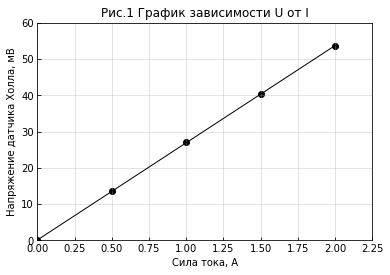

In [18]:
def exp1_Ux_I(exp1_data):
    x = (exp1_data['I, A'].tolist())
    A = np.vstack((x, np.ones_like(x))).T
    k_UI, b = np.linalg.lstsq(A, exp1_data['Ux, мВ'].tolist(), rcond=None)[0]

    x1 = np.linspace(min(x), max(x))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x1, k_UI * x1 + b, color='black', linewidth='1')
    ax1.scatter(x, exp1_data['Ux, мВ'].tolist(), color='black')
    ax1.set_xlabel('Сила тока, А')
    ax1.set_ylabel('Напряжение датчика Холла, мВ')
    ax1.set_xlim(0, 2.25)
    ax1.set_ylim(0, 60)
    ax1.tick_params(which='major', direction='in')
    ax1.set_title('Рис.1 График зависимости U_x от I')
    ax1.grid(linewidth=0.5, alpha=0.7)
    return k_UI/1000

k_UI = exp1_Ux_I(exp1_data)
k_BI = 4 * np.pi * 1e-7 * \
    (exp1_data['Unnamed: 1'].tolist()[4]) / \
    (exp1_data['Unnamed: 1'].tolist()[2]) * 100
sigma_k_BI = np.sqrt((4 * np.pi * 1e-7 * 252 * 1e-3 / 0.2 ** 2) ** 2)
k = k_BI / k_UI
sigma_k = sigma_k_BI / k_UI
print('k_UI:', k_UI * 1000, 'мВ/А',
      '\nK_BI:', k_BI * 1000 , 'мГн/м^2',
      '\nsigma_k_BI:', sigma_k_BI * 1000, 'мГн/м^2\nk:',
      k, 'Тл/В',
      '\nsigma_k:', sigma_k, 'Тл/B')

$\frac{l}{D}=10.3>10 \Rightarrow$ поле в центре соленоида близко к предельному значению

### Эксперимент 2
Рассчитаем индукцию поля всей длины соленоида $$B=k\cdot U_x$$ $$\sigma_B=\sqrt{\left(U_x\cdot \sigma_k\right)^2+\left(k\cdot \sigma_{U_x}\right)^2}$$ и построим график зависимости магнитной индукции поля от расстояние до торца соленоида

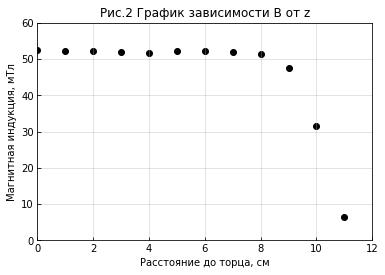

In [19]:
def exp2_(exp2_data):
    delta_z = np.asarray(exp2_data['l x холла, см'].tolist())[:12] - 15
    y = exp2_data['l Uхолла, мВ'].tolist()[:12]
    fig = plt.figure()
    ax2 = fig.add_subplot(111)
    ax2.scatter(delta_z, y, color='black')
    ax2.set_xlabel('Расстояние до торца, см')
    ax2.set_ylabel('Магнитная индукция, мТл')
    ax2.set_xlim(0, 12)
    ax2.set_ylim(0, 60)
    ax2.tick_params(which='major', direction='in')
    ax2.set_title('Рис.2 График зависимости B от z')
    ax2.grid(linewidth=0.5, alpha=0.7)

exp2_(exp2_data)

Рассчитаем теоретическую зависимость $B(z)$ для короткой части соленоида по формуле $$B(z)=\frac{1}{2}\mu_0nI\left(\frac{l_2-z}{\sqrt{\left(l_2-z\right)^2+\left(\frac{D}{2}\right)^2}}+\frac{z}{\sqrt{z^2+\left(\frac{D}{2}\right)^2}}\right)$$ Построим график зависимости теоретических и экспериментальных значений индукции магнитного поля от расстояния от левого края короткого соленоида

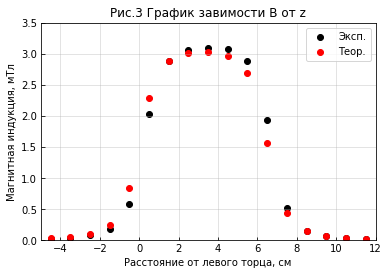

In [21]:
def exp2_short(exp2_data, k):
    z = (np.asarray(exp2_data['l1 x холла, см'].tolist())[:17] - 18.5) / 100
    y_exp = np.asarray(exp2_data['l1 Uхолла, мВ'].tolist()[:17]) * k
    l_2 = exp1_data['Unnamed: 1'].tolist()[1] / 100
    D_popolam = exp1_data['Unnamed: 1'].tolist()[3] / 2000
    B_theor = 1000 * 4 * np.pi * 1e-7 * 252 / 0.2 * \
        ((z / (np.sqrt(z ** 2 + D_popolam ** 2))) +
         ((l_2 - z) / np.sqrt((l_2 - z) ** 2 + D_popolam ** 2)))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(z * 100, y_exp, color='black', label='Эксп.')
    ax1.scatter(z * 100, B_theor, color='red', label='Теор.')
    ax1.set_xlabel('Расстояние от левого торца, см')
    ax1.set_ylabel('Магнитная индукция, мТл')
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(0, 3.5)
    ax1.tick_params(which='major', direction='in')
    ax1.set_title('Рис.3 График завимости B от z')
    ax1.grid(linewidth=0.5, alpha=0.7)
    ax1.legend()
    
exp2_short(exp2_data, k)

### Эксперимент 3
#### 1 катушка
Рассчитаем теоретичекие значения магнитной индукции $$B(z)=\frac{1}{2}\mu_0NI\frac{R^2}{\left(R^2+z^2\right)^{3/2}}$$ и построим график зависимости теоретических и экспериментальных значений индукции магнитного поля от расстояния от центра катушки

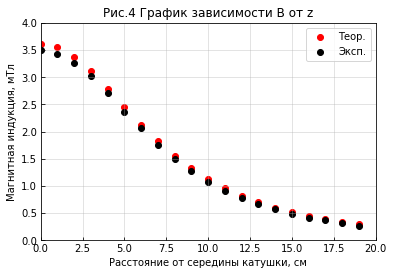

In [22]:
def exp3_1(exp3_data, k):
    N = exp3_data['x катушки, см'].tolist()[1]
    sigma_N = exp3_data['x катушки, см'].tolist()[2]
    R = exp3_data['x катушки, см'].tolist()[3] / 1000
    z = (np.asarray(exp3_data['x холла, см'].tolist())[:20] -
         exp3_data['x холла, см'].tolist()[0]) / 100

    B_theor = 0.5 * 4 * np.pi * 1e-4 * N * \
        2 * R ** 2 / (R ** 2 + z ** 2) ** (3/2)
    B_exp = np.asarray(exp3_data['U холла, см'].tolist()[:20]) * k
    sigma_B_theor = 0.5 * 4 * np.pi * 1e-7 * N * 2 * \
        R ** 2 * 3 * z / (R ** 2 + z ** 2) ** (5/2)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(z * 100, B_theor, label='Теор.', color='red')
    #ax1.errorbar(z * 100, B_theor, yerr=sigma_B_theor, fmt='|', capsize=1, linewidth=0.5)
    ax1.scatter(z * 100, B_exp, label='Эксп.', color='black')
    ax1.set_xlabel('Расстояние от середины катушки, см')
    ax1.set_ylabel('Магнитная индукция, мТл')
    ax1.set_xlim(0, 20)
    ax1.set_ylim(0, 4)
    ax1.tick_params(which='major', direction='in')
    ax1.grid(linewidth=0.5, alpha=0.7)
    ax1.set_title('Рис.4 График зависимости B от z')
    ax1.legend()
    
exp3_1(exp3_data, k)

По графику видно, что в точке 9 см экспериментальный график идет наиболее круто, то есть $R_{эф}=9$ см что очень близко к значению радиуса катушки $R_0=92$ мм
#### 2 катушки
Построим график зависимости индукции магнитного поля от расстояния между катушками для двух катушек, для суммы двух катушек, а также гарфик зависимости магнитной индукции от координаты для двух катушек с разным расстоянием между ними

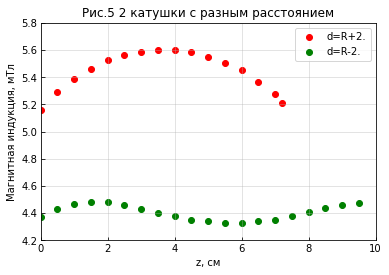

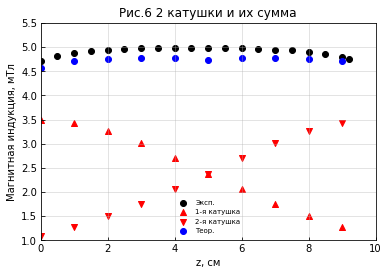

In [25]:
def exp3_2(exp3_data, k):
    z_1 = (np.asarray(exp3_data['x1 холла, см'].tolist()[:20])
           - exp3_data['x1 холла, см'].tolist()[0]) / 100
    B_exp_1 = np.asarray(exp3_data['U1 холла, см'].tolist()[:20]) * k
    z_2 = (np.asarray(exp3_data['x2 холла, см'].tolist()[:20])
           - exp3_data['x2 холла, см'].tolist()[0]) / 100
    B_exp_2 = np.asarray(exp3_data['U2 холла, см'].tolist()[:20]) * k
    z_3 = (np.asarray(exp3_data['x3 холла, см'].tolist()[:20])
           - exp3_data['x3 холла, см'].tolist()[0]) / 100
    B_exp_3 = np.asarray(exp3_data['U3 холла, см'].tolist()[:20]) * k

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(z_3 * 100, B_exp_3, label='d=R+2.', color='red')
    ax1.scatter(z_2 * 100, B_exp_2, label='d=R-2.', color='green')
    # ax1.errorbar(z * 100, B_theor, yerr=sigma_B_theor, fmt='|', linewidth=0.5)
    # ax1.scatter(z * 100, B_exp, label='Эксп.', color='black')
    ax1.set_title('Рис.5 2 катушки с разным расстоянием')
    ax1.set_xlabel('z, см')
    ax1.set_ylabel('Магнитная индукция, мТл')
    ax1.set_xlim(0, 10)
    ax1.set_ylim(4.2, 5.8)
    ax1.tick_params(which='major', direction='in')
    ax1.grid(linewidth=0.5, alpha=0.7)
    
    ax1.legend()

    z_kat = (np.asarray(exp3_data['x холла, см'].tolist())[:20] -
             exp3_data['x холла, см'].tolist()[0]) / 100
    B_exp_kat = np.asarray(exp3_data['U холла, см'].tolist()[:20]) * k
    fig1 = plt.figure()
    ax2 = fig1.add_subplot(111)
    ax2.scatter(z_1 * 100, B_exp_1, label='Эксп.', color='black')
    ax2.scatter(z_kat[:10] * 100, B_exp_kat[:10],
                label='1-я катушка', color='red', marker='^')
    ax2.scatter(z_kat[:10] * 100, B_exp_kat[10:0:-1],
                label='2-я катушка', color='red', marker='v')
    ax2.scatter(z_kat[:10] * 100, B_exp_kat[:10] +
                B_exp_kat[10:0:-1], label='Теор.', color='blue')
    ax2.set_xlabel('z, см')
    ax2.set_ylabel('Магнитная индукция, мТл')
    ax2.set_xlim(0, 10)
    ax2.set_ylim(1, 5.5)
    ax2.tick_params(which='major', direction='in')
    ax2.set_title('Рис.6 2 катушки и их сумма')
    ax2.grid(linewidth=0.5, alpha=0.7)
    ax2.legend(fontsize=7, frameon=False)

exp3_2(exp3_data, k)

Рассчитаем теоретическое значение магнитной индукции в центре катушек Гельмгольца при расстоянии $d=R_0$ по формуле $$B=\mu_0\left(\frac{4}{5}\right)^{3/2}\frac{IN}{R}$$ и сравним его с экспериментальным

In [9]:
B_theor_final = 4 * np.pi * 1e-7 * 0.8 ** 1.5 * 2 * 265 / 0.092 * 1000
B_exp_final = max(exp3_data['U1 холла, см'].tolist()) * k
print('B_theor:', B_theor_final, 'мТл\nB_exp:', B_exp_final,
      'мТл\nИх отношение:', B_theor_final / B_exp_final)

B_theor: 5.1800372973239455 мТл
B_exp: 4.970885127586104 мТл
Их отношение: 1.042075438150269


Построим график зависимости магнитной индукции от продольной координаты

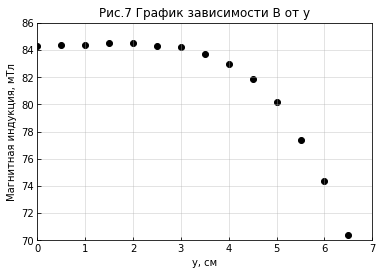

In [26]:
def exp3_y(exp3_data, k):
    z = exp3_data['y холла, см'].tolist()[:14]
    B = exp3_data['U4 холла, см'].tolist()[:14]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(z, B, color='black')
    ax1.set_xlabel('y, см')
    ax1.set_ylabel('Магнитная индукция, мТл')
    ax1.set_xlim(0, 7)
    ax1.set_ylim(70, 86)
    ax1.tick_params(which='major', direction='in')
    ax1.grid(linewidth=0.5, alpha=0.7)
    ax1.set_title('Рис.7 График зависимости B от y')

exp3_y(exp3_data, k)

Видно, что экспериментальное значение близко к теоретическому.
## *Основные результаты*
1. Была произведена калибровка датчика Холла, в результате которой были посчитаны $k_{UI}$, $k_{BI}$ и $$k=\frac{k_{UI}}{k_{BI}}=(59.0\pm 0.3)\frac{Тл}{В}$$
2. Было оценено относительное значение поля B в центре соленоида по сравнению с теоретическим значением $$\frac{l}{D}\simeq 10.3$$
3. Построены графики зависимости магнитной индукции длинного и короткого соленоидов от расстояния до их левых торцов
4. Построена теоретическая зависимость магнитной индукции от расстояния до торца короткого по формуле $$B=\frac{1}{2}\mu_0nI\left(\frac{l_2-z}{\sqrt{\left(l_2-z\right)^2+\left(\frac{D}{2}\right)^2}}+\frac{z}{\sqrt{z^2+\left(\frac{D}{2}\right)^2}}\right)$$ 
5. Построены графики зависимостей теоретической и экспериментально магнитной индукции от расстояния до катушки Гельмгольца, а также аналогичная зависимость для двух катушек с разными расстояниями $\left(d_0=R_0, d=R_0+2 см, d=R_0-2 см\right)$ между ними
6. Построена зависимость магнитной индукции от поперечной координаты для 2-х катушек: теоретическое значение $B_{теор}=5.18\frac{Тл}{В}$ близко к экспериментальному $B_{эксп}=4.97 \frac{Тл}{В}$

## *Выводы*
1. По *Рис.2* видно, что  значение магнитной индукции постоянно внутри соленоида, за исключением краевых точек. Для короткого соленоида экспериментальные значения магнитной индукции сходятся с теорией.
2. Для одной катушки Гельмгольца также экспериментальные данные хорошо сходятся с теорией. При разных расстояниях между катушками получаются разные зависимости. Подтверждено, что наиболее равномерное магнитное поле будет при $d=R_0$. При $d=R_0-2см$ один четко выраженный максимум, при $d=R_0+2см$ два четких максимумов.
3. Экспериментальное значение магнитной индукции в центре катушки Гельмгольца близко к теоретическому, что подтверждает правильность модели.